In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore')


from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,r2_score



In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
151,4,114,65,0,0,21.9,0.432,37,0
263,3,142,80,15,0,32.4,0.200,63,0
230,4,142,86,0,0,44.0,0.645,22,1
575,1,119,44,47,63,35.5,0.280,25,0
321,3,112,74,30,0,31.6,0.197,25,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA and Preprocessing

In [54]:
# Create the ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

profile.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

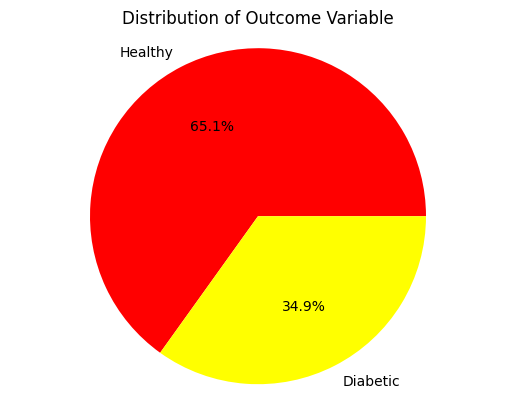

In [7]:
def target_percent():
    outcome_counts = df['Outcome'].value_counts()
    labels = ['Healthy', 'Diabetic']
    colors = ['red', 'yellow']

    plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%')

    plt.title('Distribution of Outcome Variable')
    plt.axis('equal')
    plt.show()
    
target_percent()

<Axes: xlabel='Age', ylabel='Density'>

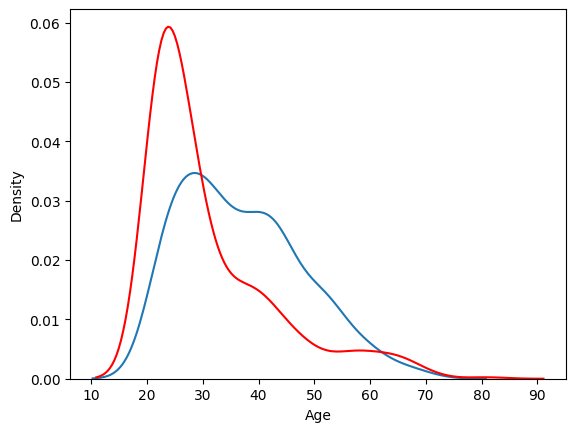

In [8]:
sns.distplot(df[df['Outcome']==1]['Age'],hist=False)
sns.distplot(df[df['Outcome']==0]['Age'],hist=False,color='red')

Here we can see that in early age most of the people are healthy and as age increases preople are becoming diabetecs

<Axes: xlabel='Age', ylabel='Outcome'>

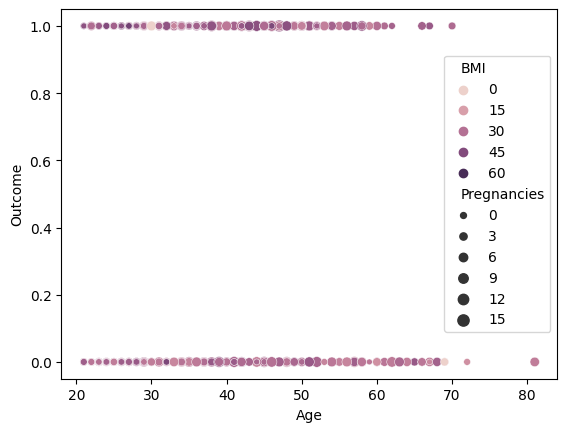

In [9]:
sns.scatterplot(df, x=df['Age'], y=df['Outcome'], hue=df['BMI'], size=df['Pregnancies'] )

Here we can see that upper line is more darker(more BMI) and size of dots is larger(more pregnancies)

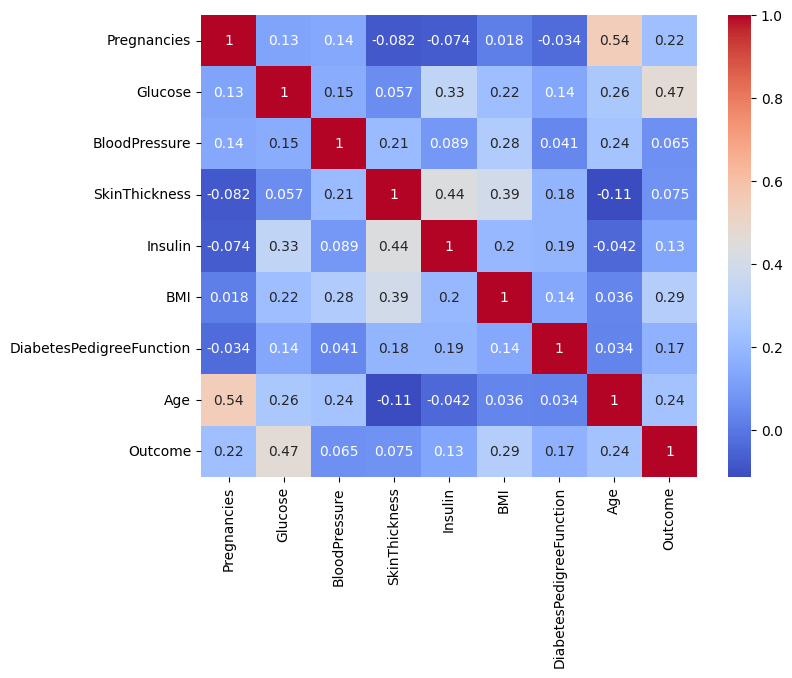

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Here we can see that outcome is strongly coerelated to glucose

# Outlier 

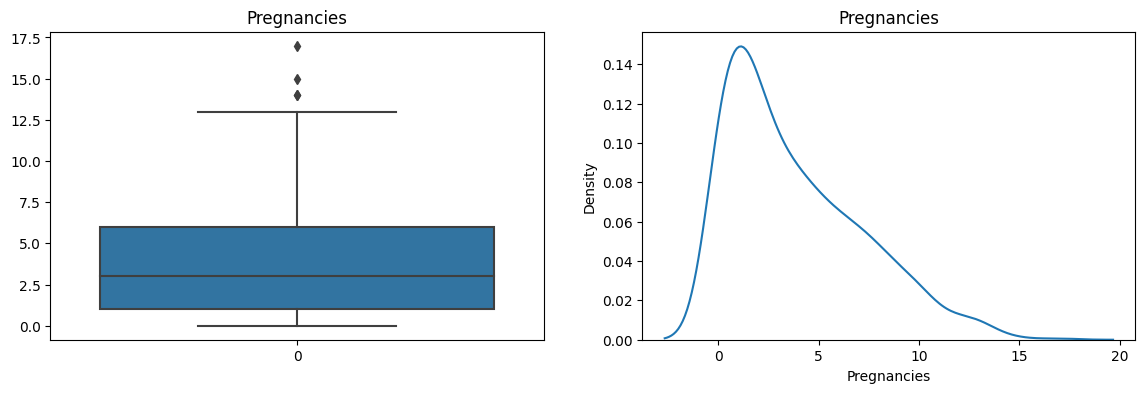

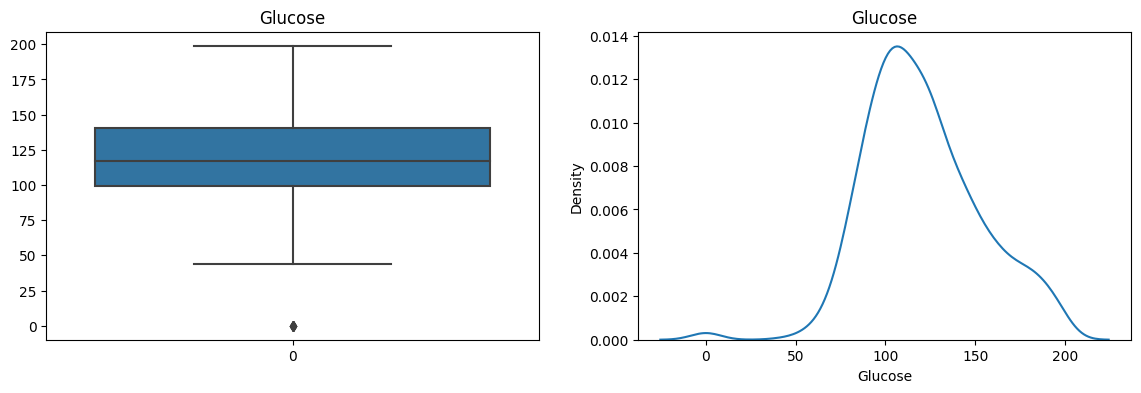

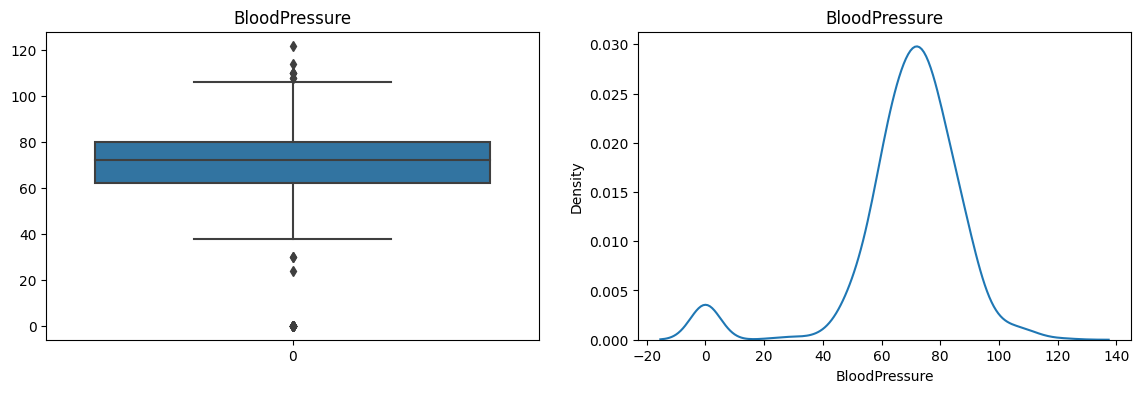

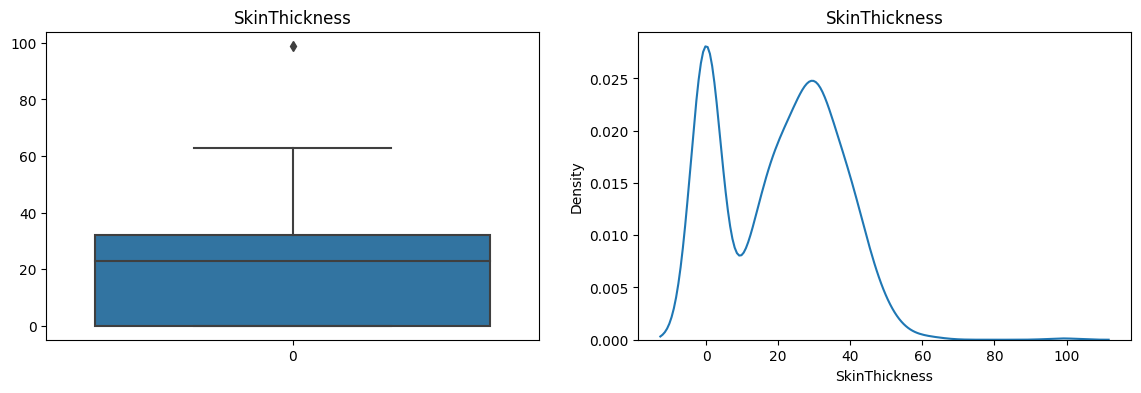

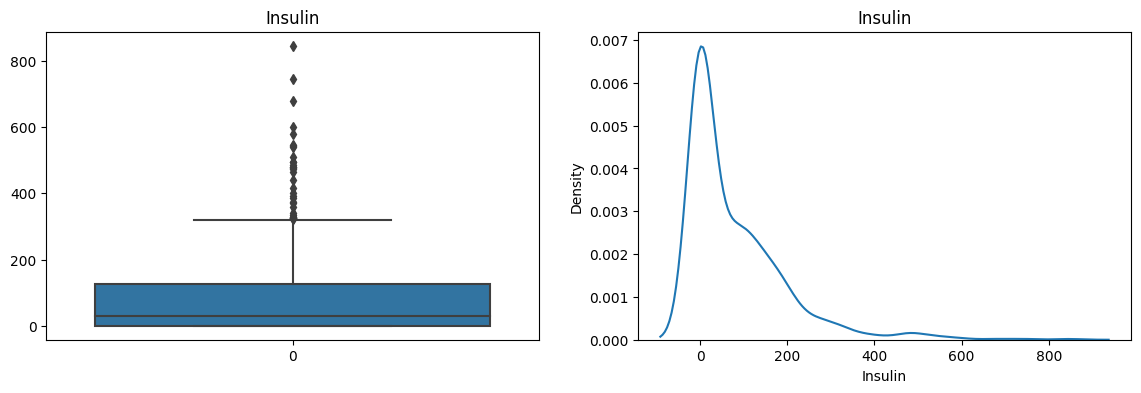

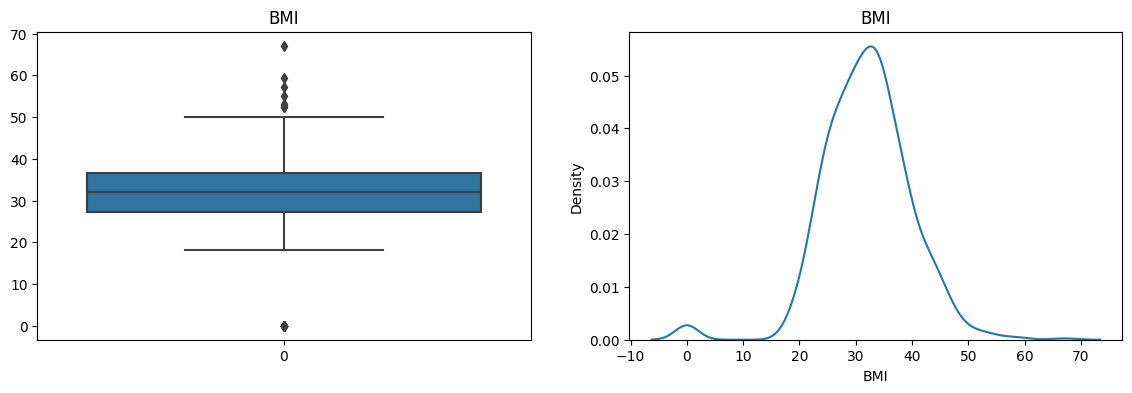

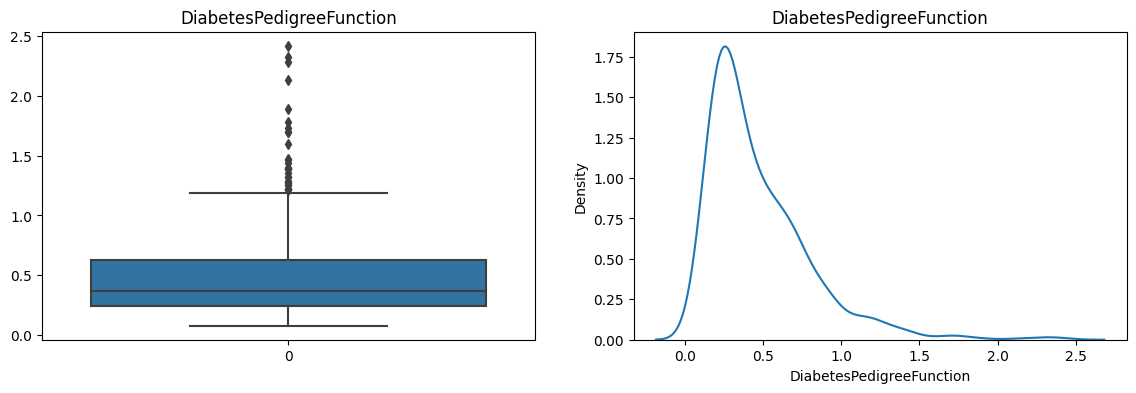

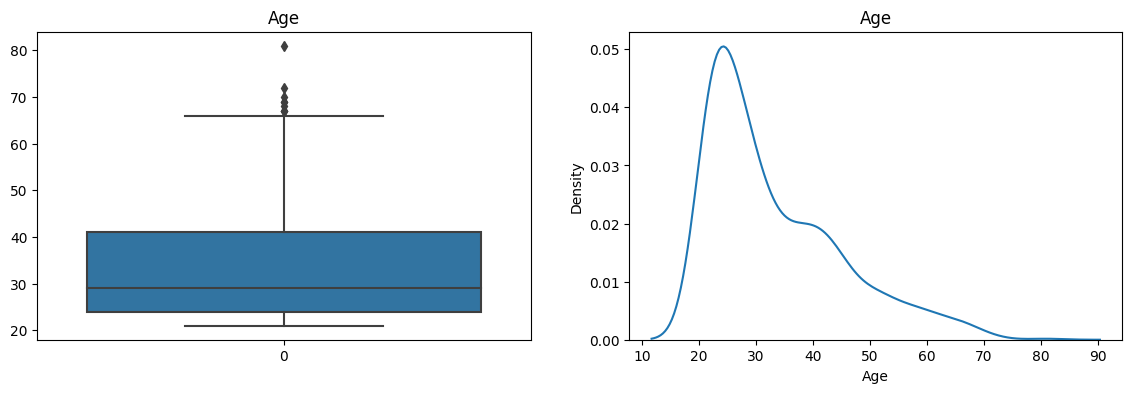

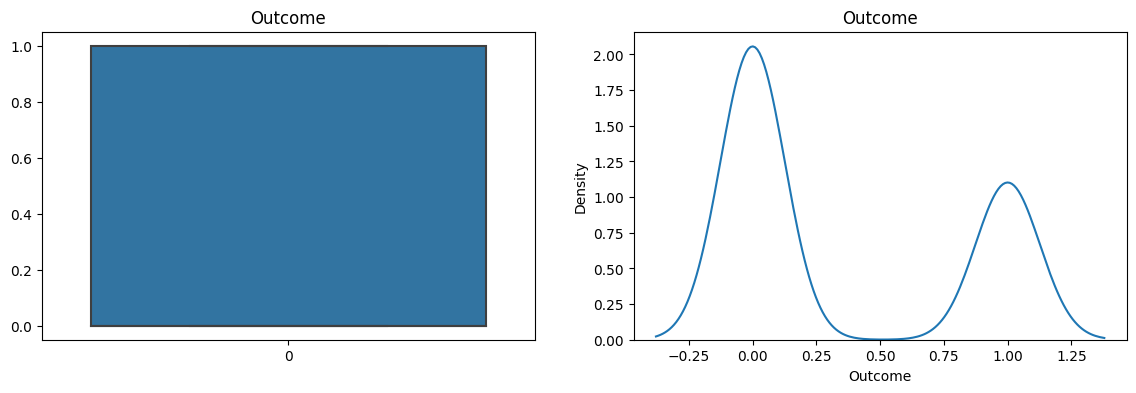

In [11]:
# Checking of Outlier

for col in df:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.boxplot(df[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(df[col],hist=False)
    plt.title(col)

# Capping Outlier

In [12]:
# Finding the IQR
percentile25 = df['Pregnancies'].quantile(0.25)
percentile75 = df['Pregnancies'].quantile(0.75)

In [13]:
print(percentile25,percentile75)

1.0 6.0


In [14]:
iqr = percentile75 - percentile25
iqr

5.0

In [15]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print(upper_limit, lower_limit)

13.5 -6.5


In [16]:
df[df['Pregnancies']> upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [17]:
df['Pregnancies'] = np.where(
    df['Pregnancies'] > upper_limit, upper_limit,
    np.where(
        df['Pregnancies'] < lower_limit,
        lower_limit,
        df['Pregnancies']
    )
)

Text(0.5, 1.0, 'Pregnancies')

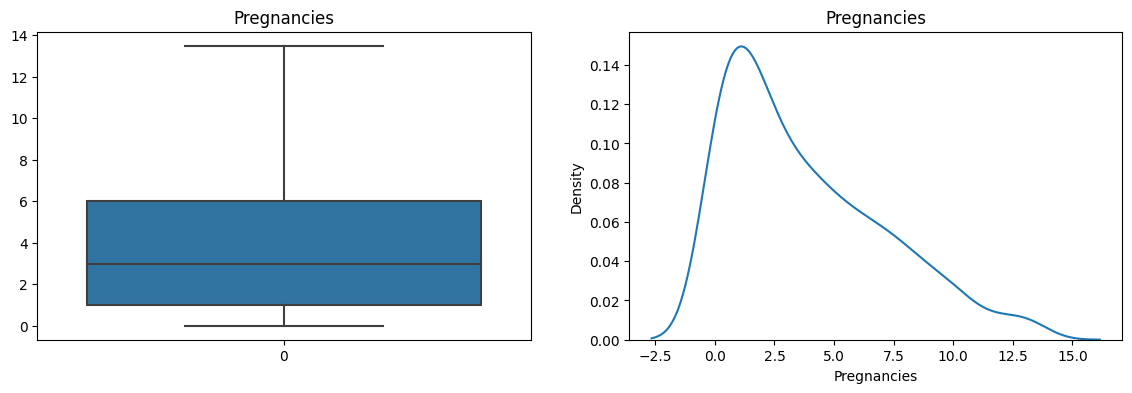

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(df['Pregnancies'])
plt.title('Pregnancies')

plt.subplot(122)
sns.distplot(df['Pregnancies'],hist=False)
plt.title('Pregnancies')

In [19]:
# Finding the IQR
percentile25 = df['Insulin'].quantile(0.25)
percentile75 = df['Insulin'].quantile(0.75)
print(percentile25,percentile75)

0.0 127.25


In [20]:
iqr = percentile75 - percentile25
iqr

127.25

In [21]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print(upper_limit, lower_limit)

318.125 -190.875


In [22]:
# spliting the data in to train and test data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Outcome']),df['Outcome'], test_size=0.3, random_state=42)

In [23]:
len(df[df['Insulin']> upper_limit])

34

In [24]:
df['Insulin'] = np.where(
    df['Insulin'] > upper_limit, upper_limit,
    np.where(
        df['Insulin'] < lower_limit,
        lower_limit,
        df['Insulin']
    )
)

Text(0.5, 1.0, 'Insulin')

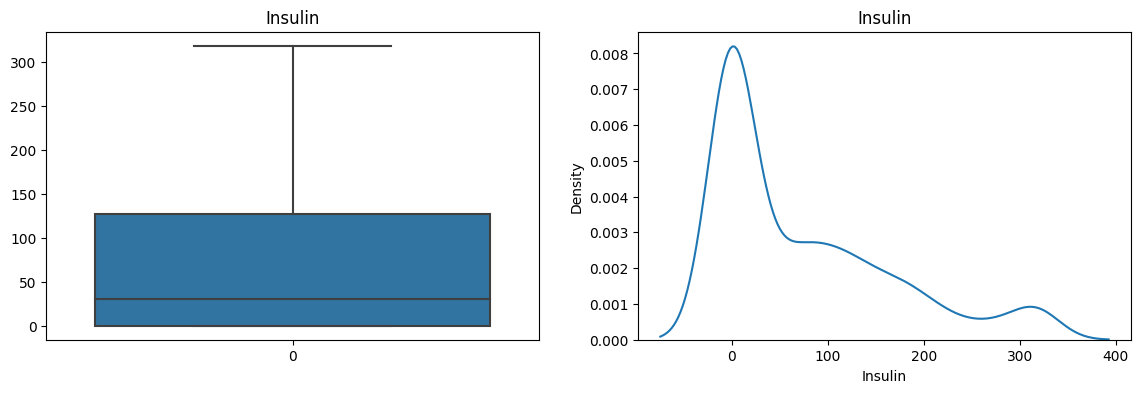

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(df['Insulin'])
plt.title('Insulin')

plt.subplot(122)
sns.distplot(df['Insulin'],hist=False)
plt.title('Insulin')

In [26]:
# Finding the IQR
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)
print(percentile25,percentile75)

24.0 41.0


In [27]:
iqr = percentile75 - percentile25
iqr

17.0

In [28]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print(upper_limit, lower_limit)

66.5 -1.5


In [29]:
len(df[df['Age']> upper_limit])

9

In [30]:
df['Age'] = np.where(
    df['Age'] > upper_limit, upper_limit,
    np.where(
        df['Age'] < lower_limit,
        lower_limit,
        df['Age']
    )
)

Text(0.5, 1.0, 'Age')

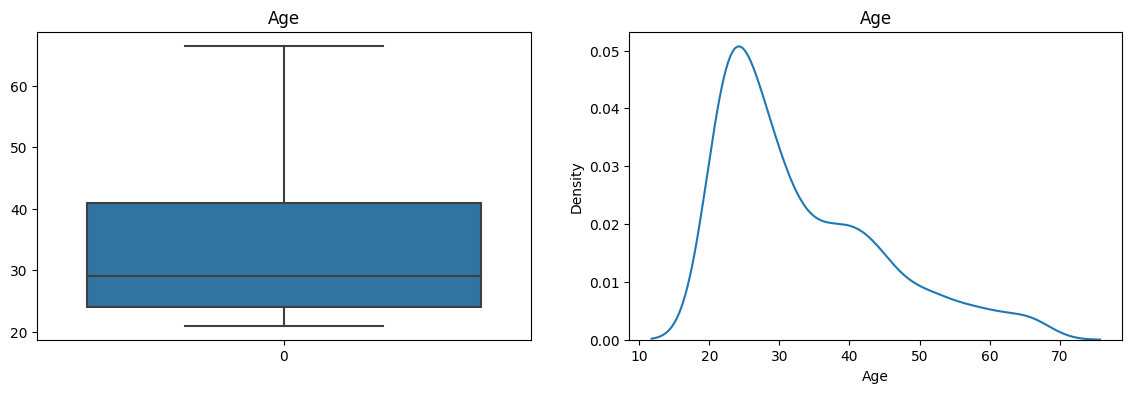

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(df['Age'])
plt.title('Age')

plt.subplot(122)
sns.distplot(df['Age'],hist=False)
plt.title('Age')

In [32]:
# Finding the IQR
percentile25 = df['DiabetesPedigreeFunction'].quantile(0.25)
percentile75 = df['DiabetesPedigreeFunction'].quantile(0.75)
print(percentile25,percentile75)

0.24375 0.62625


In [33]:
iqr = percentile75 - percentile25
iqr

0.38249999999999995

In [34]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print(upper_limit, lower_limit)

1.2 -0.32999999999999996


In [35]:
len(df[df['DiabetesPedigreeFunction']> upper_limit])

29

In [36]:
df['DiabetesPedigreeFunction'] = np.where(
    df['DiabetesPedigreeFunction'] > upper_limit, upper_limit,
    np.where(
        df['DiabetesPedigreeFunction'] < lower_limit,
        lower_limit,
        df['DiabetesPedigreeFunction']
    )
)

Text(0.5, 1.0, 'DiabetesPedigreeFunction')

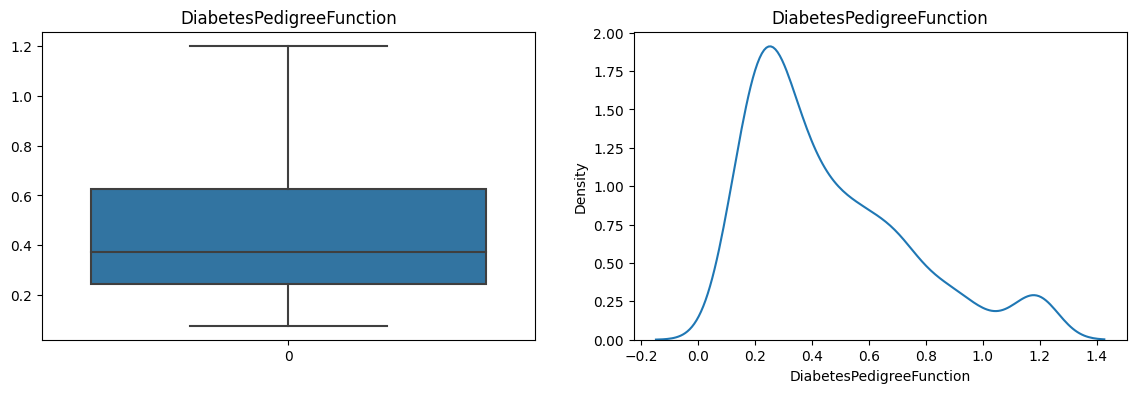

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.title('DiabetesPedigreeFunction')

plt.subplot(122)
sns.distplot(df['DiabetesPedigreeFunction'],hist=False)
plt.title('DiabetesPedigreeFunction')

In [38]:
# normalization

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

Normalization hasn't given better result that why i have discarded it.

In [39]:
X_train_scaled=X_train
X_test_scaled=X_test

# Missing Value(Zero's)

In [40]:
# Replacing zeros with the mean value in Glucose column

X_train_scaled['Glucose'] = X_train_scaled.Glucose.apply(lambda x: X_train_scaled['Glucose'].mean() if x == 0 else x)
X_test_scaled['Glucose'] = X_test_scaled.Glucose.apply(lambda x: X_test_scaled['Glucose'].mean() if x == 0 else x)


In [41]:
# Putting null values in the place of zeroes in columns -> Insulin, SkinThickness, BloodPressure, BMI so the we apply isnull function

X_train_scaled['Insulin'].replace(0,np.nan,inplace=True)
X_test_scaled['Insulin'].replace(0,np.nan, inplace=True)
X_train_scaled['SkinThickness'].replace(0,np.nan,inplace=True)
X_test_scaled['SkinThickness'].replace(0,np.nan, inplace=True)
X_train_scaled['BloodPressure'].replace(0,np.nan,inplace=True)
X_test_scaled['BloodPressure'].replace(0,np.nan, inplace=True)
X_train_scaled['BMI'].replace(0,np.nan,inplace=True)
X_test_scaled['BMI'].replace(0,np.nan, inplace=True)
X_train_scaled.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
153,1.0,153.0,82.0,42.0,485.0,40.6,0.687,23
200,0.0,113.0,80.0,16.0,NaN,31.0,0.874,21
243,6.0,119.0,50.0,22.0,176.0,27.1,1.318,33
248,9.0,124.0,70.0,33.0,402.0,35.4,0.282,34
738,2.0,99.0,60.0,17.0,160.0,36.6,0.453,21
676,9.0,156.0,86.0,NaN,NaN,24.8,0.230,53
577,2.0,118.0,80.0,NaN,NaN,42.9,0.693,21
399,3.0,193.0,70.0,31.0,NaN,34.9,0.241,25
100,1.0,163.0,72.0,NaN,NaN,39.0,1.222,33
129,0.0,105.0,84.0,NaN,NaN,27.9,0.741,62


In [42]:
# Replacing null values with random number of the respective columns so that distribution of the columns should not change drastically

X_train_scaled['Insulin'][X_train_scaled['Insulin'].isnull()] = X_train_scaled['Insulin'].dropna().sample(X_train_scaled['Insulin'].isnull().sum()).values
X_test_scaled['Insulin'][X_test_scaled['Insulin'].isnull()] = X_test_scaled['Insulin'].dropna().sample(X_test_scaled['Insulin'].isnull().sum()).values
X_train_scaled['SkinThickness'][X_train_scaled['SkinThickness'].isnull()] = X_train_scaled['SkinThickness'].dropna().sample(X_train_scaled['SkinThickness'].isnull().sum()).values
X_test_scaled['SkinThickness'][X_test_scaled['SkinThickness'].isnull()] = X_test_scaled['SkinThickness'].dropna().sample(X_test_scaled['SkinThickness'].isnull().sum()).values
X_train_scaled['BloodPressure'][X_train_scaled['BloodPressure'].isnull()] = X_train_scaled['BloodPressure'].dropna().sample(X_train_scaled['BloodPressure'].isnull().sum()).values
X_test_scaled['BloodPressure'][X_test_scaled['BloodPressure'].isnull()] = X_test_scaled['BloodPressure'].dropna().sample(X_test_scaled['BloodPressure'].isnull().sum()).values
X_train_scaled['BMI'][X_train_scaled['BMI'].isnull()] = X_train_scaled['BMI'].dropna().sample(X_train_scaled['BMI'].isnull().sum()).values
X_test_scaled['BMI'][X_test_scaled['BMI'].isnull()] = X_test_scaled['BMI'].dropna().sample(X_test_scaled['BMI'].isnull().sum()).values

In [43]:
X_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1.0,95.0,60.0,18.0,58.0,23.9,0.260,22
139,5.0,105.0,72.0,29.0,325.0,36.9,0.159,28
485,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24
547,4.0,131.0,68.0,21.0,166.0,33.1,0.160,28
18,1.0,103.0,30.0,38.0,83.0,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5.0,139.0,64.0,35.0,140.0,28.6,0.411,26
106,1.0,96.0,122.0,33.0,41.0,22.4,0.207,27
270,10.0,101.0,86.0,37.0,56.0,45.6,1.136,38
435,0.0,141.0,80.0,41.0,48.0,42.4,0.205,29


In [44]:
X_train_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.00000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.715084,121.974387,72.16946,28.551210,155.815642,32.305028,0.469920,33.074488
std,3.224905,30.138680,12.56235,10.065535,119.712971,6.979637,0.342087,11.685319
min,0.000000,44.000000,24.00000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.00000,21.000000,81.000000,27.100000,0.241000,24.000000
50%,3.000000,118.000000,72.00000,29.000000,125.000000,32.000000,0.374000,29.000000
75%,6.000000,139.000000,80.00000,36.000000,184.000000,36.500000,0.612000,41.000000
max,13.500000,199.000000,122.00000,63.000000,846.000000,67.100000,2.420000,81.000000


In [45]:
# Using Standardization

scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
127,-0.532320,0.000851,-0.969628,-1.049229,-0.416514,-0.359240,0.722945,-0.948610
264,-0.842696,-0.630156,0.623915,-1.745319,-0.617180,-1.850678,0.061679,-0.948610
150,-0.842696,1.362497,-0.013502,0.342953,-1.152291,0.960109,2.200553,-0.006380
11,1.329934,0.366170,-0.013502,-1.148670,-0.257653,0.085323,-0.584957,0.507563
261,-0.842696,-0.995476,-0.810274,-0.353138,-0.959985,-1.836337,0.035346,-0.691639
308,0.088431,-1.061898,1.261332,1.834576,-0.851291,0.773680,-0.315769,-0.349009
5,-0.532320,-1.327585,-1.607045,-0.651462,-0.341264,-0.545670,3.596234,-0.691639
14,0.398807,-0.165204,1.580041,-1.745319,-0.006820,0.257412,-0.388918,0.421906
507,1.329934,-0.763000,0.942624,2.132901,-0.341264,0.443842,-0.239694,1.449793
65,0.709183,-0.165204,1.898750,-0.253696,2.710539,-0.516988,-0.915590,-0.263352


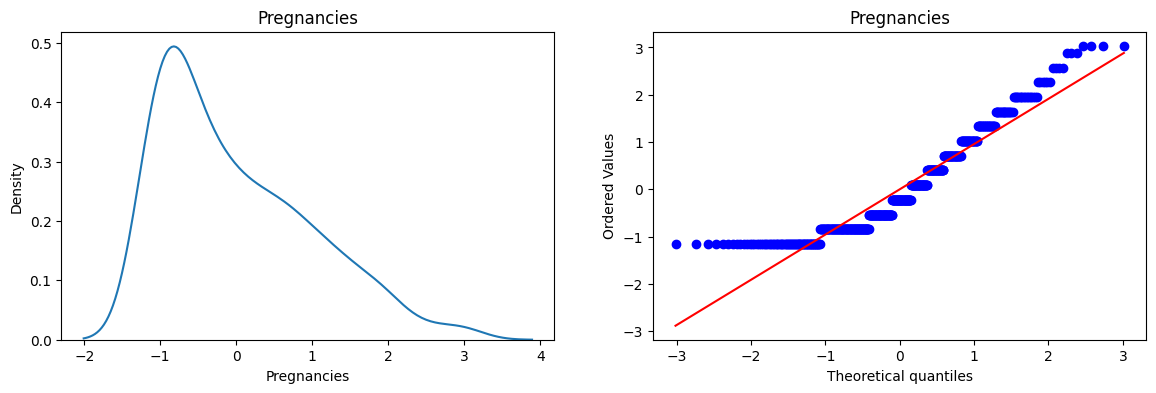

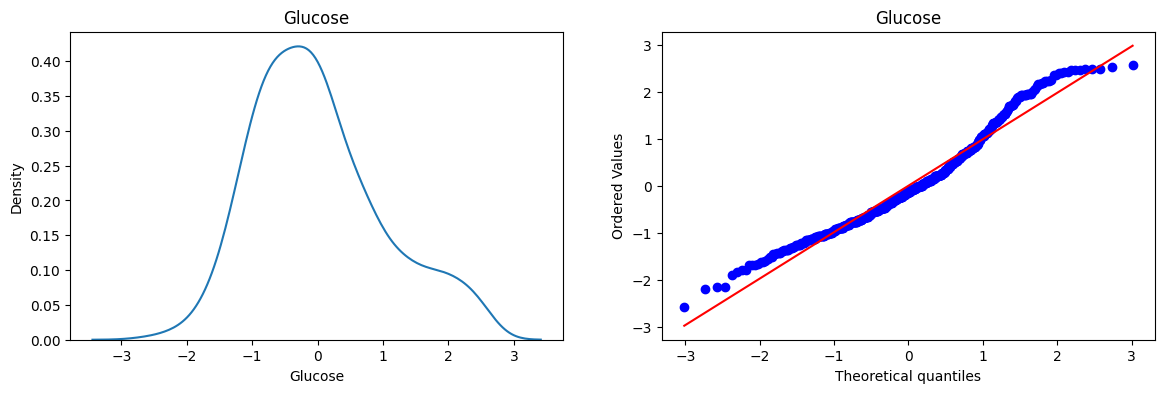

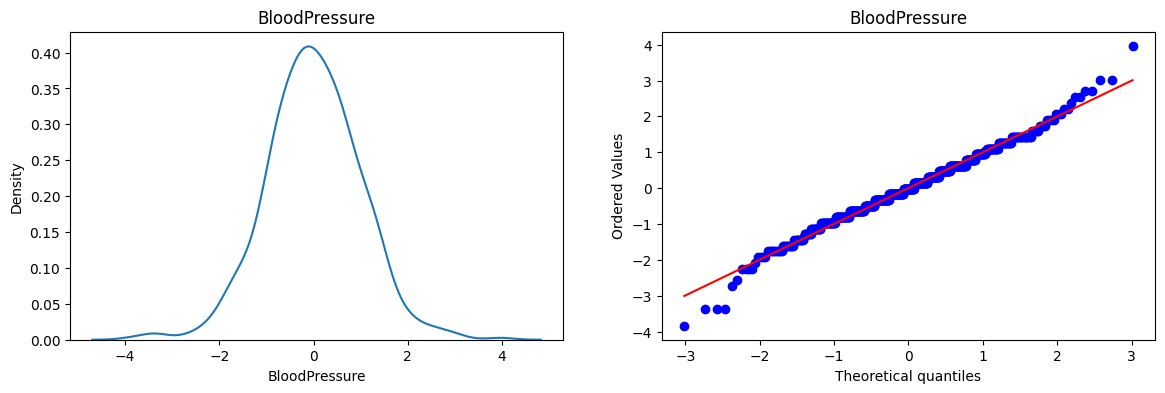

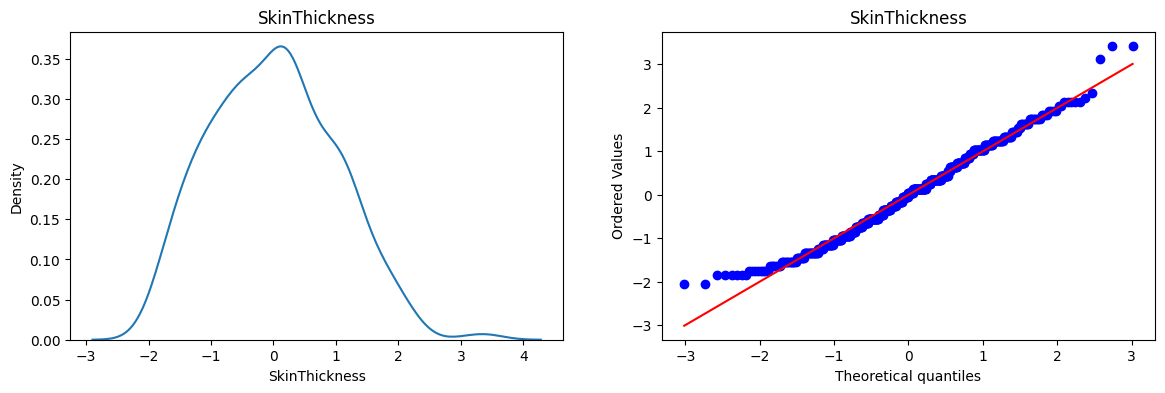

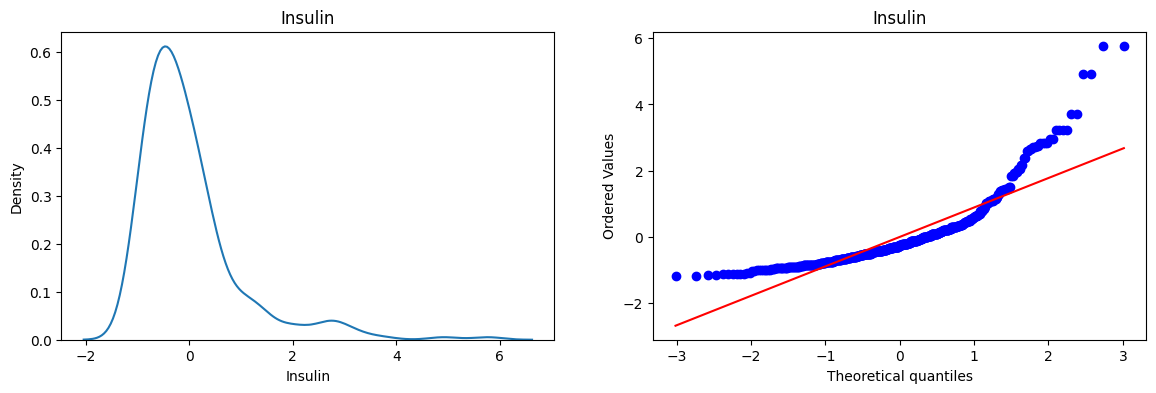

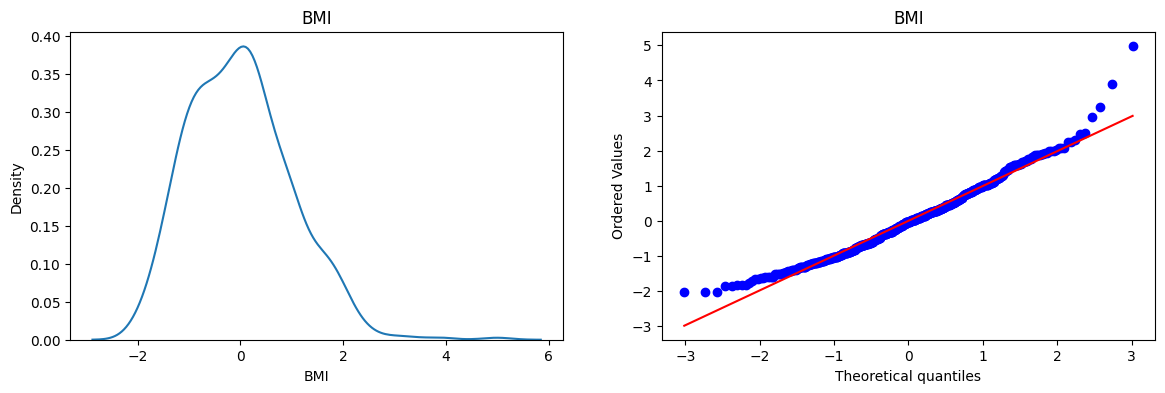

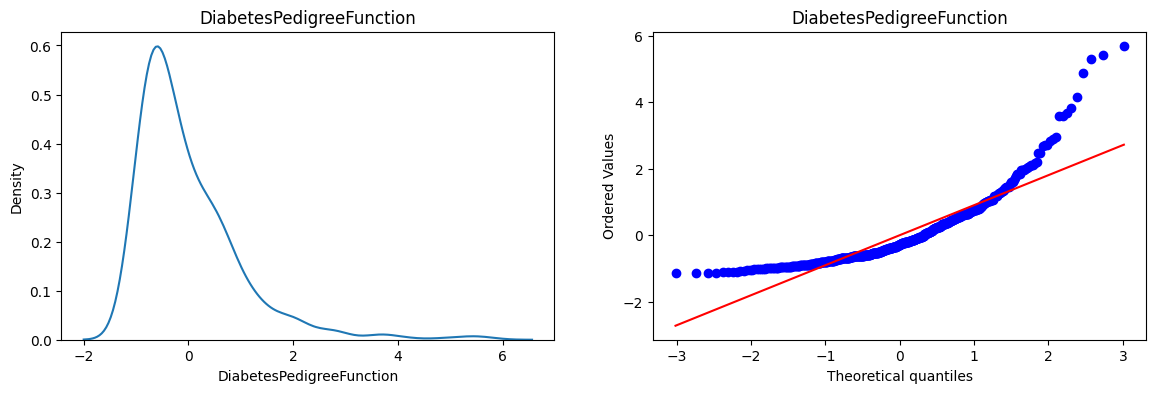

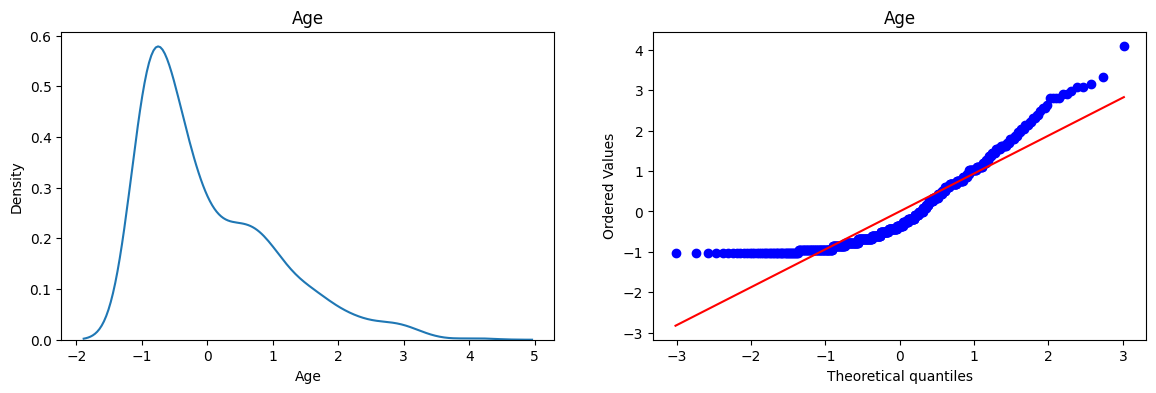

In [46]:
# Showing distribution of data before transformation 

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train_scaled[col],hist=False)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_scaled[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [47]:
# Function transformer on columns 
pt1 = PowerTransformer()

X_train_transformed = pt1.fit_transform(X_train_scaled)
X_test_transformed = pt1.transform(X_test_scaled)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)
X_train_transformed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.899552,-0.922113,-0.969422,-1.067221,-1.208731,-1.308085,-0.659576,-1.216070
1,0.634391,-0.500672,-0.018420,0.099750,1.465914,0.727806,-1.355152,-0.248331
2,-1.442244,0.549598,-0.336443,1.303237,1.120405,1.364259,-0.072025,-0.862026
3,0.347926,0.428412,-0.336443,-0.736272,0.504565,0.222895,-1.347630,-0.248331
4,-0.899552,-0.582438,-3.321776,0.947635,-0.692999,1.474748,-1.178151,0.340462
...,...,...,...,...,...,...,...,...
532,0.634391,0.666533,-0.653371,0.673539,0.211825,-0.474416,0.142605,-0.539407
533,-0.899552,-0.878589,4.023344,0.486562,-1.602103,-1.592508,-1.008475,-0.389919
534,1.623149,-0.665496,1.103733,0.857045,-1.253204,1.721962,1.663596,0.749743
535,-1.442244,0.723564,0.621385,1.215278,-1.435903,1.375396,-1.022336,-0.114662


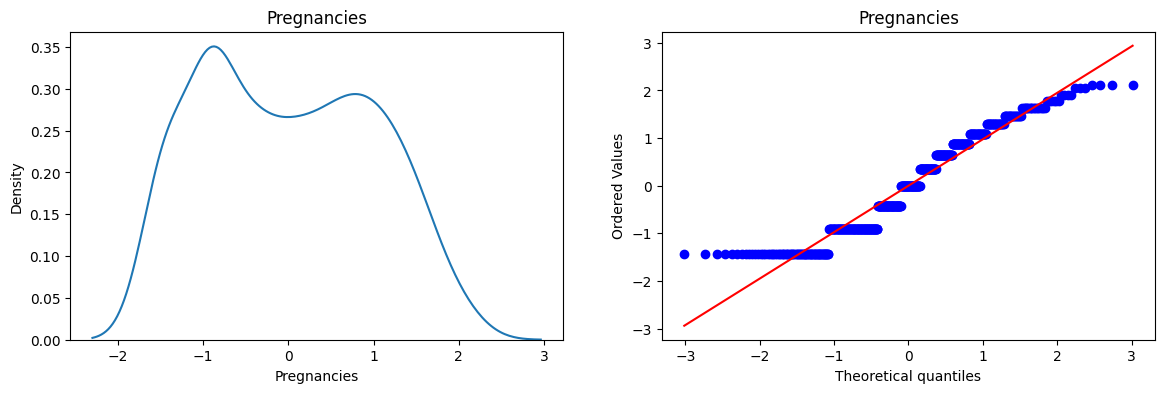

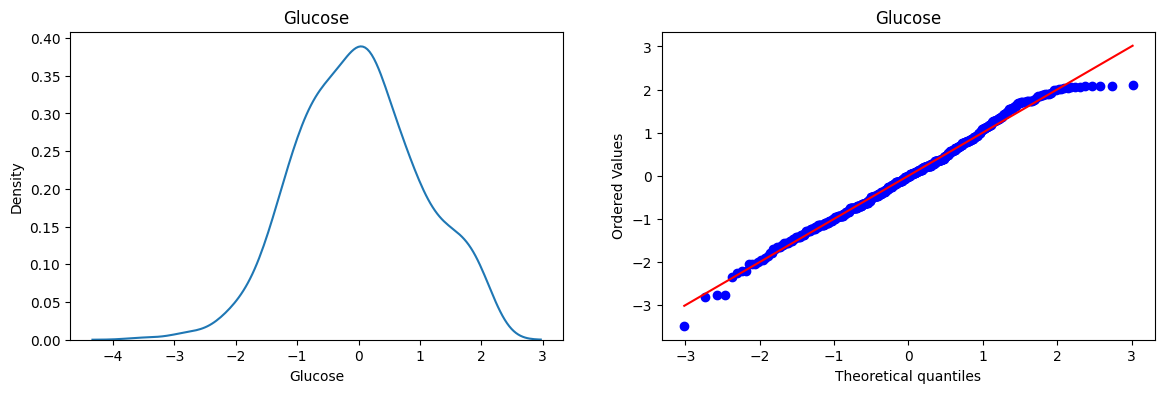

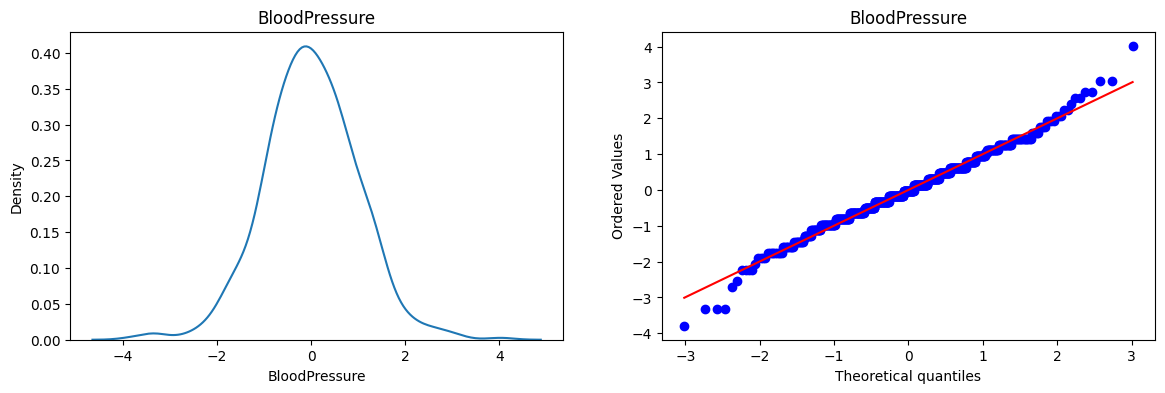

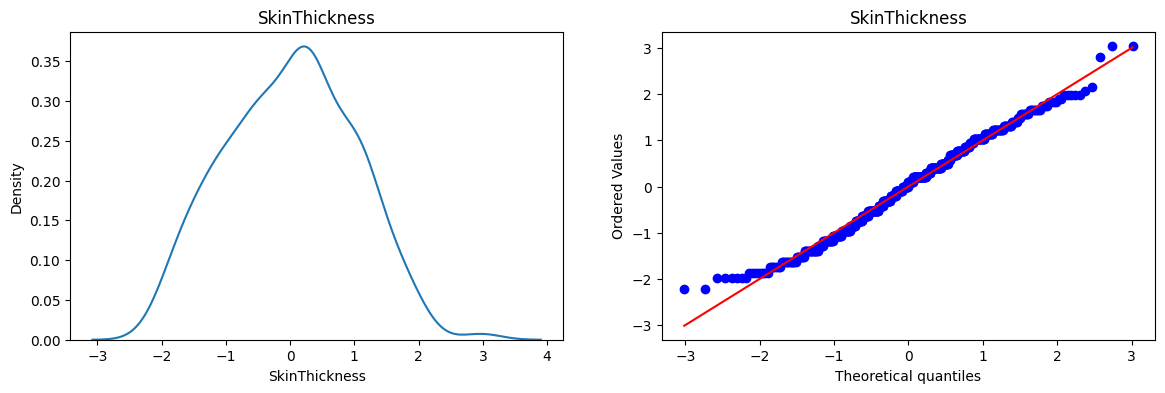

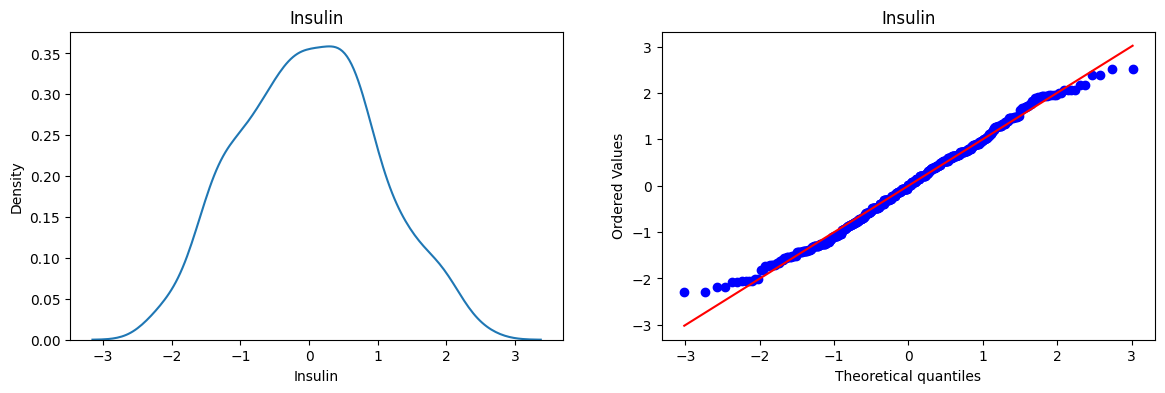

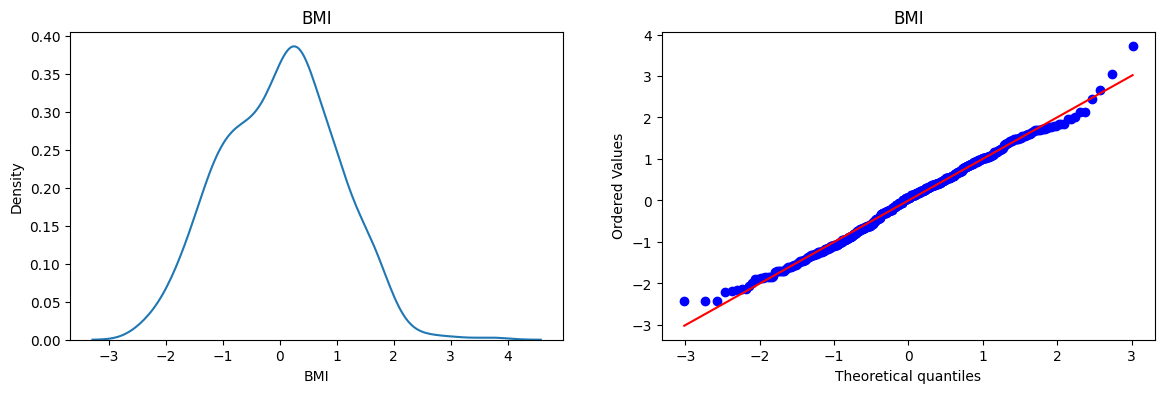

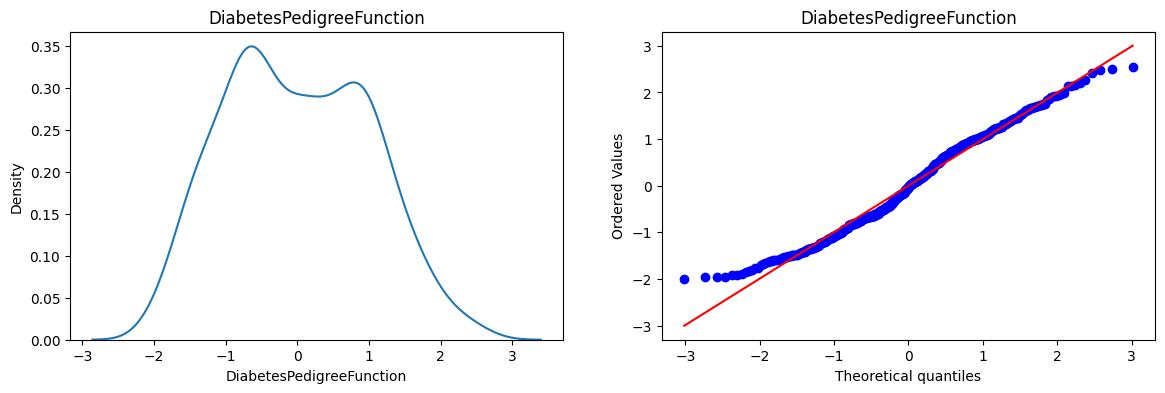

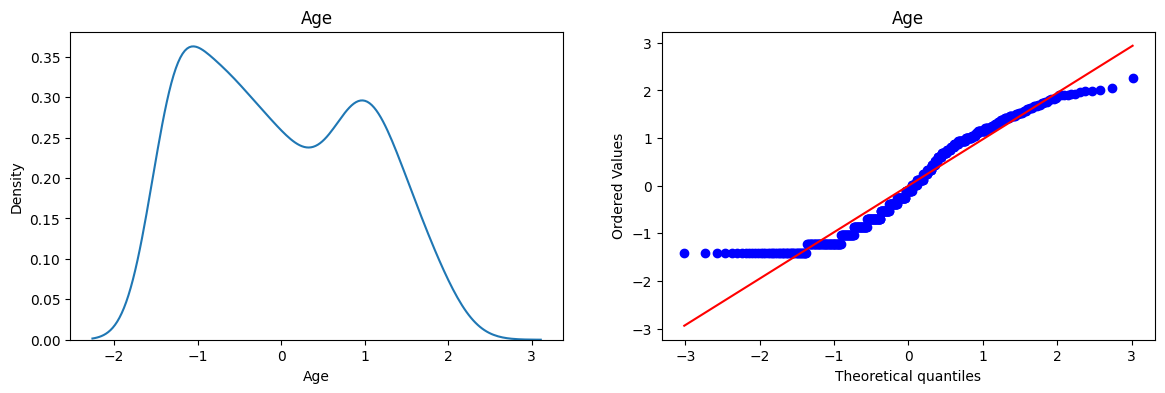

In [48]:
# Distribution of the data after transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train_transformed[col],hist=False)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# Model Training

In [49]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier(random_state=42)

In [50]:
# Applying Cross validation for better and accurate result

cv_scores1 = cross_val_score(clf1, X_train_transformed, y_train, cv=20)
cv_scores2 = cross_val_score(clf2, X_train_transformed, y_train, cv=20)
cv_scores3 = cross_val_score(clf3, X_train_transformed, y_train, cv=20)

print("Average cross-validation score for clf1:", np.mean(cv_scores1))
print("Average cross-validation score for clf2:", np.mean(cv_scores2))
print("Average cross-validation score for clf2:", np.mean(cv_scores3))

Average cross-validation score for clf1: 0.7726495726495727
Average cross-validation score for clf2: 0.6854700854700855
Average cross-validation score for clf2: 0.7672364672364672


In [71]:
param_grid = { 
    'n_estimators': [700,800,900],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
CV_rfc = GridSearchCV(estimator=clf3, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'n_estimators': [700, 800, 900]})

In [74]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 800}

In [75]:
CV_rfc.best_score_

0.7838698511595709

In [66]:
lr = clf1.fit(X_train_transformed, y_train)
dt = clf2.fit(X_train_transformed, y_train)
rf = clf3.fit(X_train_transformed, y_train)

In [67]:
y_pred1 = lr.predict(X_test_scaled)
y_pred2 = dt.predict(X_test_scaled)
y_pred3 = rf.predict(X_test_scaled)

In [68]:
print('accuracy_score_lr:', accuracy_score(y_test, y_pred1))
print('Precision_Score_lr:',precision_score(y_test, y_pred1))
print('Recall_Score_lr:',recall_score(y_test, y_pred1))
print('F1_Score_lr:',f1_score(y_test, y_pred1))

accuracy_score_lr: 0.7359307359307359
Precision_Score_lr: 0.6266666666666667
Recall_Score_lr: 0.5875
F1_Score_lr: 0.6064516129032258


In [69]:
print('accuracy_score_dt:', accuracy_score(y_test, y_pred2))
print('Precision_Score_dt:',precision_score(y_test, y_pred2))
print('Recall_Score_dt:',recall_score(y_test, y_pred2))
print('F1_Score_dt:',f1_score(y_test, y_pred2))

accuracy_score_dt: 0.70995670995671
Precision_Score_dt: 0.5802469135802469
Recall_Score_dt: 0.5875
F1_Score_dt: 0.5838509316770186


In [70]:
print('accuracy_score_rf:', accuracy_score(y_test, y_pred3))
print('Precision_Score_rf:',precision_score(y_test, y_pred3))
print('Recall_Score_rf:',recall_score(y_test, y_pred3))
print('F1_Score_rf:',f1_score(y_test, y_pred3))

accuracy_score_rf: 0.7272727272727273
Precision_Score_rf: 0.6197183098591549
Recall_Score_rf: 0.55
F1_Score_rf: 0.5827814569536425
